In [13]:
import pandas as pd
df=pd.read_csv('/content/GGR (1).csv')


In [14]:
df

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.148742
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.978811
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
5,5,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
6,6,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
7,7,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
8,8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.801343
9,9,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000


In [15]:
x=df.drop(columns='pIC50')
y=df.iloc[:,-1]

In [16]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_varience(input,threshold=0.1):
  selection=VarianceThreshold(threshold)
  selection.fit(input)
  return input[input.columns[selection.get_support(indices=True)]]

x=remove_low_varience(x)
x

#removes red feat



,Unnamed: 0,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP143,...,PubchemFP713,PubchemFP716,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP798,PubchemFP819,PubchemFP821
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,6,1,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
7,7,1,1,1,0,1,1,1,0,1,...,0,0,1,0,1,0,0,1,0,1
8,8,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,9,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#x=x.drop(columns='Unnamed: 0')
x.to_csv('descriptor_list.csv',index=False)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
model=RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(x,y)
r2=model.score(x,y)
r2

0.9299820128687067

In [8]:
y_pred=model.predict(x)
y_pred

array([5.73405291, 5.23738892, 5.04149427, 5.01637723, 5.00703248,
       5.01820688, 5.00687101, 4.99695954, 5.00768772, 6.89145827,
       6.8954101 , 6.98809524, 7.02211395, 6.98784289, 6.90014606,
       6.79493786, 6.96840301, 7.0109691 , 7.00554938, 7.00914114,
       7.0124563 , 7.00331515, 7.00359176, 7.00019382, 7.0823592 ,
       7.01409043, 6.99599033, 7.00219382, 7.00217322, 7.        ,
       6.95436765, 7.01017121, 7.11782916, 8.16716409, 8.58281722,
       8.61722831, 8.63727145, 8.62122241, 8.68816905, 7.3206612 ,
       7.24690897, 7.81612775, 7.3520181 , 7.18008333, 6.80393135,
       5.08238218, 5.32107459, 4.61890246, 3.01094129])

In [9]:
print('Mean sq err (MSE):%.2f'% mean_squared_error(y,y_pred))
print('coe of deter (R^2):%.2f'% r2_score(y,y_pred))

Mean sq err (MSE):0.14
coe of deter (R^2):0.93


In [10]:
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 'Ex pIC50')

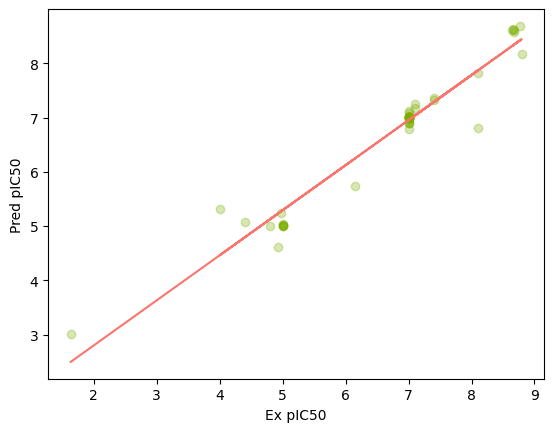

In [11]:
plt.scatter(x=y,y=y_pred,c="#7CAE00",alpha=0.3)


z=np.polyfit(y,y_pred,1)
p=np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Pred pIC50')
plt.xlabel('Ex pIC50')

In [6]:
import pickle

In [13]:
pickle.dump(model, open('hunti_model.pkl','wb'))

In [5]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-07-16 04:39:06--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-07-16 04:39:07--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2024-07-16 04:39:08 (169 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-07-16 04:39:08--  https://github

In [7]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [8]:
import pandas as pd

In [ ]:
df_in=pd.read_table("/content/example_acetylcholinesterase.txt", sep=' ',header=None)

df_in

FileNotFoundError: [Errno 2] No such file or directory: '/content/example_acetylcholinesterase.txt'

In [ ]:


df_in.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/5). 
Processing CHEMBL336398 in molecule.smi (2/5). 
Processing CHEMBL131588 in molecule.smi (3/5). Average speed: 2.07 s/mol.
Processing CHEMBL130628 in molecule.smi (4/5). Average speed: 1.07 s/mol.
Processing CHEMBL130478 in molecule.smi (5/5). Average speed: 0.92 s/mol.
Descriptor calculation completed in 3.161 secs . Average speed: 0.63 s/mol.


In [ ]:
dfou=pd.read_csv("/content/descriptors_output.csv")
#dfou.insert(0, 'Unnamed: 0',[i for i in range(len( dfou['Name']))])
dfou.to_csv("/content/descriptors_output.csv")
d=pd.read_csv("/content/descriptors_output.csv")
d

,Unnamed: 0,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,CHEMBL133897,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,CHEMBL336398,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,CHEMBL130628,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,CHEMBL131588,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CHEMBL130478,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def build_model(input_data):
  load_model=pickle.load(open("/content/hunti_model.pkl",'rb'))
  prediction=load_model.predict(input_data)
 # st.header('**Prediction Out**')
  prediction_output=pd.Series(prediction,name='pIC50')
  molecule_name=pd.Series(df[1],name='molecule_name')
  df=pd.concat([molecule_name,prediction_output],axis=1)
  return df

In [18]:
dr=pd.read_csv('/content/descriptor_list.csv')
dr

,Unnamed: 0,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP143,...,PubchemFP713,PubchemFP716,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP798,PubchemFP819,PubchemFP821
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,6,1,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
7,7,1,1,1,0,1,1,1,0,1,...,0,0,1,0,1,0,0,1,0,1
8,8,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,9,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(type('/content/descriptor_list.csv'))

<class 'str'>


In [9]:
from pathlib import Path

def mod(ino,count):



 if Path(ino).suffix =='.csv':
     df_in=pd.read_csv(ino)

     df_in=df_in.rename(columns = {'canonical_smiles':'smiles','molecule_chembl_id':'Name'})
     select=['smiles','Name']
     df_in=df_in[select]
     df_in.to_csv('molecule.smi', sep='\t', index=False, header=False)
     #f=pd.read_csv('molecule.smi')
     #f=f.drop(columns='Unnamed: 0',axis=1)
     #f.to_csv('molecule.smi', sep='\t', index=False, header=False)
     ! bash padel.sh
     dfou=pd.read_csv("/content/descriptors_output.csv")
     dfou.to_csv("/content/descriptors_output.csv")
     d=pd.read_csv("/content/descriptors_output.csv")
     load_model=pickle.load(open("/content/hunti_model.pkl",'rb'))
     dr=pd.read_csv('/content/descriptor_list.csv')
     prediction=load_model.predict(d[list(dr.columns)])
     #dr=pd.read_csv("/content/descriptors_output.csv")
     data=d[['Name']]
     data['pred_pIC50']=prediction.tolist()
     data['smiles']=df_in['smiles']
     count-=1


 elif Path(ino).suffix =='.txt':
     df_in=pd.read_table(ino, sep=' ',header=None)
     df_in.to_csv('molecule.smi', sep='\t', index=False, header=False)
     #f=pd.read_csv('molecule.smi')
     #f=f.drop(columns='Unnamed: 0',axis=1)
     #f.to_csv('molecule.smi', sep='\t', index=False, header=False)
     ! bash padel.sh
     dfou=pd.read_csv("/content/descriptors_output.csv")
     dfou.to_csv("/content/descriptors_output.csv")
     d=pd.read_csv("/content/descriptors_output.csv")
     load_model=pickle.load(open("/content/hunti_model.pkl",'rb'))
     dr=pd.read_csv('/content/descriptor_list.csv')
     prediction=load_model.predict(d[list(dr.columns)])
     #dr=pd.read_csv("/content/descriptors_output.csv")
     data=d[['Name']]
     data['pred_pIC50']=prediction.tolist()
     data['smiles']=df_in[0]





 data.to_csv('data.csv')
 #prediction.to_csv('pred.csv')
 data_ref=data[data.pred_pIC50==data.pred_pIC50.max()]#data.pred_pIC50.min()
 #data_ref=data_ref.reset_index(drop=True)
 data_ref_in=data_ref.drop('pred_pIC50',axis=1)
 #data_ref_in.reset_index(drop=True)
 data_ref_in=smile(data_ref_in)
 data_ref_in.to_csv('/content/Ref.csv') #

 if count>1:
  print(count)
  mod('/content/Ref.csv',count)

 if count==1:
  return prediction








In [10]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 26.1 MB/s eta 0:00:00


In [59]:
def smile(dref):
  data_sm=generate_random_molecule("".join(dref.smiles.to_list()))
  sarata=[str(i) for i in range(len(data_sm)) ]
  print(data_sm)
  da=pd.DataFrame({'smiles':data_sm,'Name':sarata})
  da.to_csv('/content/Re.csv')
  return da

import random

def generate_random_molecule(m):
    V5=['n','N','P']
    Valence5=['N','P']
    Valence6=['O','S']
    Valence7=['F','Cl','Br','I']
    count=1
    mol=m
    for i in mol:
      if i in Valence6 or (i in Valence7) or (i in V5):
        count+=1
    print(count)

    MOL=[]
    for j in range(((4^4))*count):
      mol=m
      mor=""

      for i in range(len(mol)):

       if mol[i] in Valence6:
          mor+=random.choice(Valence6)
       elif mol[i] in Valence7:
          mor+=random.choice(Valence7)
       elif mol[i] in V5:
          mor+=random.choice(Valence5)
       else: #mol[i] not in (Valence6 or Valence7 or Valence5):
        mor+=mol[i]
      MOL.append(mor)


    MOL=list(set(MOL))
    MOL.append(mol)

    #print(mol)
    return MOL



In [33]:
D=pd.read_csv("/content/mw (2).csv")

In [34]:
D[D.pIC50==D.pIC50.max()]

,Unnamed: 0,molecule_chembl_id,canonical_smiles,0,MW,MWLOGp,#Hdon,#Hacc,pIC50
47,47,CHEMBL4875017,Cn1cc2cc(-c3ccc(-c4cnc(N5CCNC(CO)C5)nn4)c(O)c3...,active,435.463,1.7075,3.0,9.0,8.79588


In [60]:
mod('/content/mw (2).csv',count=3)

Processing CHEMBL493153 in molecule.smi (1/67). 
Processing CHEMBL493327 in molecule.smi (2/67). 
Processing CHEMBL500972 in molecule.smi (3/67). 
Processing CHEMBL495005 in molecule.smi (4/67). Average speed: 2.24 s/mol.
Processing CHEMBL494838 in molecule.smi (5/67). Average speed: 1.79 s/mol.
Processing CHEMBL509988 in molecule.smi (6/67). Average speed: 1.39 s/mol.
Processing CHEMBL149800 in molecule.smi (7/67). Average speed: 1.24 s/mol.
Processing CHEMBL445226 in molecule.smi (8/67). Average speed: 1.05 s/mol.
Processing CHEMBL494130 in molecule.smi (9/67). Average speed: 0.99 s/mol.
Processing CHEMBL444229 in molecule.smi (10/67). Average speed: 0.90 s/mol.
Processing CHEMBL494325 in molecule.smi (11/67). Average speed: 0.85 s/mol.
Processing CHEMBL494326 in molecule.smi (12/67). Average speed: 0.80 s/mol.
Processing CHEMBL493348 in molecule.smi (13/67). Average speed: 0.74 s/mol.
Processing CHEMBL153483 in molecule.smi (15/67). Average speed: 0.69 s/mol.
Processing CHEMBL449571

<ipython-input-9-64ccb955daa0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pred_pIC50']=prediction.tolist()
<ipython-input-9-64ccb955daa0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smiles']=df_in['smiles']


9
['Cn1cc(-c2ccc(-c3cnc(NC4CC(C)(C)NC(C)(C)C4)nn3)c(O)c2)cn1']
2
Processing 0 in molecule.smi (1/1). 
Descriptor calculation completed in 2.443 secs . Average speed: 2.44 s/mol.
9
['Cn1cc(-c2ccc(-c3cnc(NC4CC(C)(C)NC(C)(C)C4)nn3)c(O)c2)cn1']


<ipython-input-9-64ccb955daa0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pred_pIC50']=prediction.tolist()
<ipython-input-9-64ccb955daa0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smiles']=df_in['smiles']


In [61]:
c=pd.read_csv("/content/data.csv")
c


,Unnamed: 0,Name,pred_pIC50,smiles
0,0,0,6.802324,Cn1cc(-c2ccc(-c3cnc(NC4CC(C)(C)NC(C)(C)C4)nn3)...


In [51]:
g=pd.read_table("/content/molecule.smi")

g
#z=['Name','smiles']
#g_new=g[z]
#g=g.drop(columns='Unnamed: 0',axis=1)
#g_new.to_csv('molecule.smi')
#gr=pd.read_csv("/content/molecule.smi")
#gr
#4\tCSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C\tCHEMBL130478


,Cn1cc(-c2ccc(-c3cnc(NC4CC(C)(C)NC(C)(C)C4)nn3)c(O)c2)cn1,0


In [52]:
d=pd.read_csv("/content/descriptors_output.csv")
d

,Unnamed: 0,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pd.read_csv('/content/Ref.csv')

,Unnamed: 0,smiles,Name
0,0,Cn1cc(-c2ccc(-c3cnc(NC4CC(C)(C)NC(C)(C)C4)nn3)...,0


In [36]:
pd.read_csv("/content/Re.csv")

,Unnamed: 0,smiles,Name
0,0,CCOOSOC(=OOOO)[C@@H](P)CCCNC(=N)P,0
1,1,CCSOOOC(=OOSO)[C@@H](P)CCCPC(=N)P,1
2,2,CCOOSOC(=SOSO)[C@@H](P)CCCNC(=N)P,2
3,3,CCSOOOC(=OOOO)[C@@H](N)CCCPC(=P)N,3
4,4,CCSOSOC(=SOSO)[C@@H](P)CCCPC(=P)P,4
5,5,CCSOSOC(=SOOO)[C@@H](P)CCCNC(=N)P,5
6,6,CCOOC(=OO)[C@@H](N)CCCNC(=P)P,6


In [ ]:
data_ref_in=pd.concat([data_ref['smiles'],data_ref['Name']],axis=1)
data_ref_in

NameError: name 'data_ref' is not defined

In [ ]:
data_ref_in.to_csv('molecule.smi', sep='\t', index=False, header=False)

NameError: name 'data_ref_in' is not defined

In [ ]:
dfou2=pd.read_csv("/content/descriptors_output.csv")
#dfou.insert(0, 'Unnamed: 0',[i for i in range(len( dfou['Name']))])
dfou2.to_csv("/content/descriptors_output.csv")
d2=pd.read_csv("/content/descriptors_output.csv")
d2

,Unnamed: 0.1,Unnamed: 0,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1255,1255,1255,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,1256,1256,1256,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,1257,1257,1257,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1258,1258,1258,1258,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 df_in


NameError: name 'df_in' is not defined